# WELCOME TO DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR
#              INSURANCE CLAIMS DATA (CASE STUDY)

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
claimsdata=pd.read_csv('claims.csv')
customer=pd.read_csv('cust_demographics.csv')


In [95]:
claimscustomer=pd.merge(left=customer,right=claimsdata,left_on='CUST_ID',right_on='customer_id',how='inner')
claimscustomer

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [96]:
claimscustomer.drop('customer_id',axis=1,inplace=True)
claimscustomer.rename(columns={'CUST_ID' : 'Customer_Id'},inplace=True)

In [97]:
claimscustomer['claim_date']=pd.to_datetime(claimscustomer['claim_date'])

In [98]:
claimscustomer['DateOfBirth']= pd.to_datetime(claimscustomer.DateOfBirth,format='%d-%b-%y')

In [99]:
claimscustomer.loc[(claimscustomer.DateOfBirth.dt.year > 2020),"DateOfBirth"]=claimscustomer[claimscustomer.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [100]:
claimscustomer['claim_id']=claimscustomer['claim_id'].astype('Int64')

In [101]:
claimscustomer.dtypes

Customer_Id                     int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        Int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [102]:
claimscustomer['claim_date']= pd.to_datetime(claimscustomer.claim_date,format='%d-%b-%y')

In [103]:
import warnings
warnings.filterwarnings('ignore')


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

#### Here, I am converting the column 'claim_amount'  from object datatype to float because the values are in float format.

In [104]:
claimscustomer['claim_amount'] = claimscustomer['claim_amount'].str.replace('$','').astype('float')

In [105]:
claimscustomer.rename(columns={'claim_amount' : 'claim_amount_in_$'},inplace=True)

In [106]:
claimscustomer.dtypes

Customer_Id                     int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        Int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount_in_$             float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [107]:
na=claimscustomer.isna().sum()
data=claimscustomer.shape[0]
nas=(na/data)*100
nas

Customer_Id            0.000000
gender                 0.000000
DateOfBirth            0.000000
State                  0.000000
Contact                0.000000
Segment                0.000000
claim_id               0.000000
incident_cause         0.000000
claim_date             0.000000
claim_area             0.000000
police_report          0.000000
claim_type             0.000000
claim_amount_in_$      5.990783
total_policy_claims    0.921659
fraudulent             0.000000
dtype: float64

### Hence, we can observe that claims_amount contains more than 5% NA values, so I decided to replace the NA values

<Axes: >

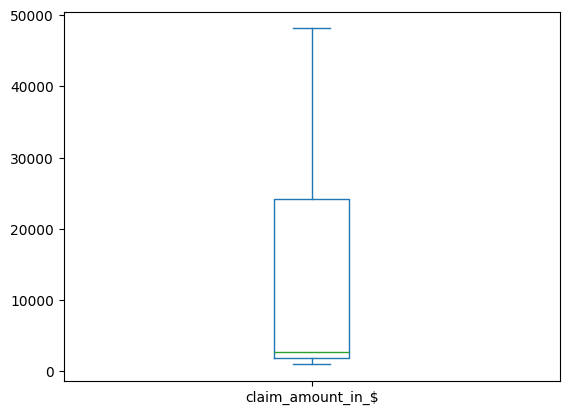

In [108]:
claimscustomer['claim_amount_in_$'].plot(kind='box')

#####

#### Hence we can observe outliers in the above chart, I will fill the missing values of 'claim_amount_in_$' with the median.....

In [109]:
median=claimscustomer['claim_amount_in_$'].median()
claimscustomer['claim_amount_in_$'].fillna(median,inplace=True)
claimscustomer.isna().sum()

Customer_Id             0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount_in_$       0
total_policy_claims    10
fraudulent              0
dtype: int64

### Here na values are less then 5% that`s why i am leaving that values as it is..

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [157]:
claimscustomer['alert_flag'] = claimscustomer.apply(lambda row: 1 if (row['claim_type']== 'Injury only') & (row['police_report']=='No') else 0, axis=1)
claimscustomer[:20]

,Customer_Id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount_in_$,total_policy_claims,fraudulent,alert_flag,Age,Age_cat,claim_month,Claim_Year
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0,56,Adult,October,2018
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0,48,Adult,October,2018
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0,56,Adult,October,2018
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0,47,Adult,October,2018
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,2740.0,2.0,No,0,38,Adult,October,2018
5,17682060,Female,1974-11-21,NV,186-195-3465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,0,49,Adult,October,2018
6,40480522,Female,1984-05-30,NV,739-259-6835,Gold,52377605,Driver error,2018-10-30,Auto,Unknown,Material and injury,26310.0,1.0,No,0,40,Adult,October,2018
7,28932340,Male,1996-01-05,LA,652-265-8231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,2740.0,1.0,No,0,28,Youth,October,2018
8,65208809,Male,1964-04-22,VA,286-128-6132,Platinum,91386759,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,0,60,Adult,October,2018
9,86491727,Female,1997-01-29,IL,294-187-3286,Gold,32178193,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,0,27,Youth,October,2018


#### Hence, I created alert_flag with 0 and 1, here 0 indicates police_report Yes and 1 indicates police_report No and Unknown

### 5. One customer can claim for insurance more than once and in each claim, 
multiple categories of claims can be involved. However, customer I 
should remain uniqu .
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column

In [111]:
claimscustomer['claim_date'] = pd.to_datetime(claimscustomer['claim_date'])
claimscustomer = claimscustomer.sort_values(by='claim_date', ascending=False)
claimscustomer = claimscustomer.drop_duplicates(subset='Customer_Id', keep='first').reset_index(drop = True)
claimscustomer.head(5)

,Customer_Id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount_in_$,total_policy_claims,fraudulent,alert_flag
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,1
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,1
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,1
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,1
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,2740.0,2.0,No,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [112]:
#for claim_amount column i have already replaced values with median 

In [113]:
claimscustomer.isna().sum()

Customer_Id             0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount_in_$       0
total_policy_claims    10
fraudulent              0
alert_flag              0
dtype: int64

In [114]:
cat_var=['incident_cause','claim_area','police_report','claim_type','fraudulent']
cont_var=['total_policy_claims']

claimscustomer[cat_var]=claimscustomer[cat_var].fillna(claimscustomer.mode().iloc[0])

claimscustomer[cont_var]=claimscustomer[cont_var].fillna(claimscustomer[cont_var].mean())

In [115]:
claimscustomer.isna().sum()

Customer_Id            0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount_in_$      0
total_policy_claims    0
fraudulent             0
alert_flag             0
dtype: int64

#For the claim_id and claim_date columns, we will not replace the NA values because these columns are non-replaceable."

### 7 Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18

Youth 18-30

Adult 30-60

Senior > 60

In [116]:
import datetime as dt
date=dt.datetime.now()-claimscustomer.DateOfBirth
claimscustomer['Age']=date.apply(lambda x: x.days / 365)
claimscustomer['Age']=claimscustomer['Age'].astype('int64')

In [117]:
date= [
    (claimscustomer['Age'] < 18),
    (claimscustomer['Age'] >= 18) & (claimscustomer['Age'] <= 30),
    (claimscustomer['Age'] > 30) & (claimscustomer['Age'] <= 60),
    (claimscustomer['Age'] > 60)
]
choices = ['Children', 'Youth', 'Adult', 'Senior']
claimscustomer['Age_cat'] = np.select(date, choices, default='Unknown')

In [118]:
claimscustomer

,Customer_Id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount_in_$,total_policy_claims,fraudulent,alert_flag,Age,Age_cat
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,1,56,Adult
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,1,48,Adult
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,1,56,Adult
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,1,47,Adult
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,2740.0,2.0,No,1,38,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,1,24,Youth
1074,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,1,30,Youth
1075,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,1,50,Adult
1076,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,1,38,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [119]:
claimsbysegments=claimscustomer.groupby('Segment')[['claim_amount_in_$']].mean().round()
print(claimsbysegments)

          claim_amount_in_$
Segment                    
Gold                12268.0
Platinum            11966.0
Silver              11478.0


In [120]:

round(claimscustomer.groupby('Segment')[['claim_amount_in_$']].mean())

,claim_amount_in_$
Segment,
Gold,12268.0
Platinum,11966.0
Silver,11478.0


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [121]:
claimscustomer.loc[claimscustomer.claim_date < pd.to_datetime('01-10-2018')-dt.timedelta(days=20)].groupby('incident_cause')[['claim_amount_in_$']].sum().add_prefix("total_").round()

,total_claim_amount_in_$
incident_cause,
Crime,351891.0
Driver error,1866762.0
Natural causes,653430.0
Other causes,2152220.0
Other driver error,1730338.0


In [122]:
claimscustomer.head(1)

,Customer_Id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount_in_$,total_policy_claims,fraudulent,alert_flag,Age,Age_cat
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,1,56,Adult


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [123]:
claimscustomer[(claimscustomer['Age_cat'] == 'Adult')&(claimscustomer['State'].isin(['TX','DE','AK']))&(claimscustomer['incident_cause'].str.contains('driver' , case=False))].shape[0]


28

#### Hence,adults from TX, DE and AK claimed insurance for driver related issues and causes are 28

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [124]:
claimamt=round(claimscustomer.groupby(['Segment','gender'])['claim_amount_in_$'].sum()/claimscustomer['claim_amount_in_$'].sum()*100).reset_index()
gen_seg_amt=claimamt.pivot_table(index='Segment',columns='gender',values='claim_amount_in_$')
gen_seg_amt

gender,Female,Male
Segment,,
Gold,16.0,20.0
Platinum,18.0,16.0
Silver,14.0,17.0


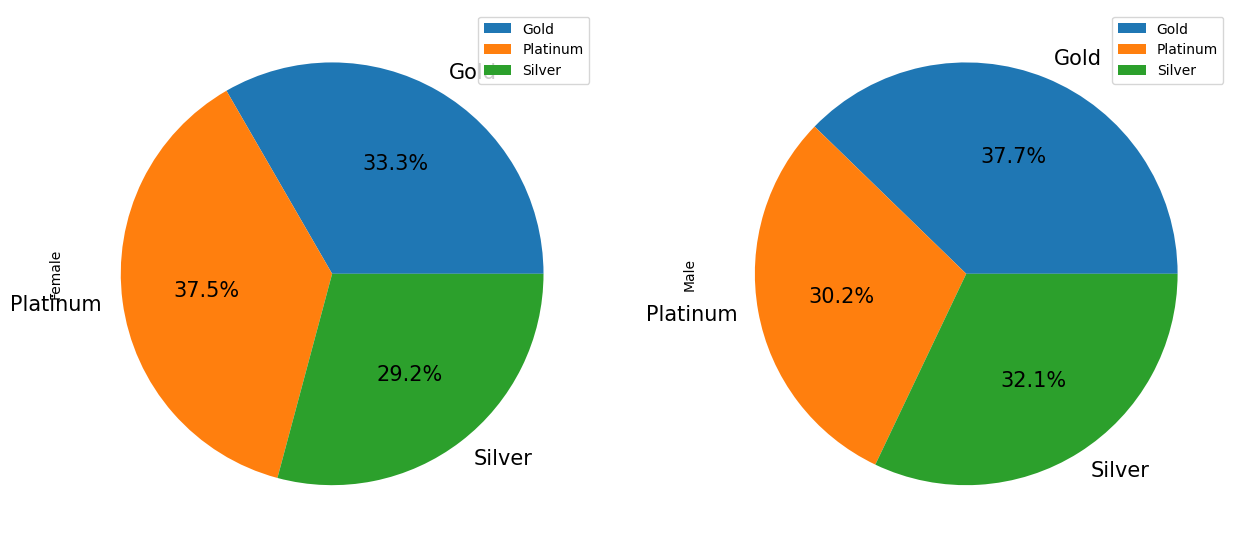

In [125]:
gen_seg_amt.plot(kind='pie',subplots=True,figsize=(15,7),legend=True,fontsize=15,autopct='%1.1f%%')
plt.show()

#                                                                    OR

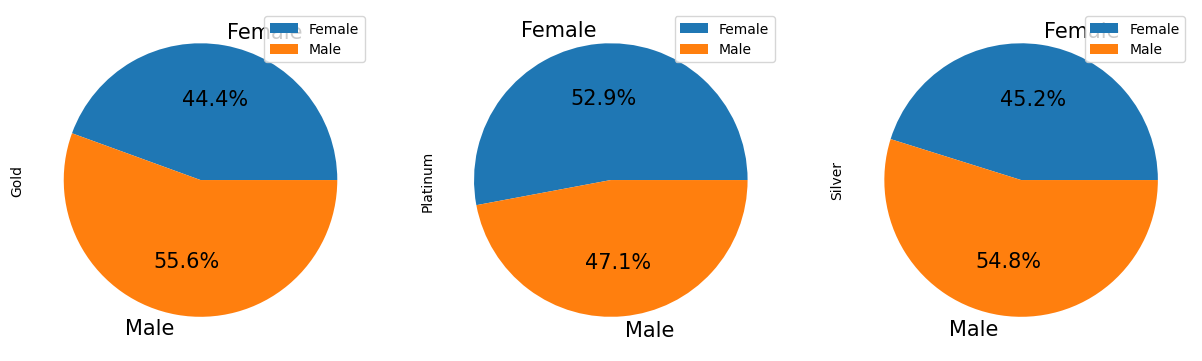

In [126]:
gen_seg_amt.T.plot(kind='pie',subplots=True,figsize=(15,7),legend=True,fontsize=15,autopct='%1.1f%%')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [127]:

male_female=claimscustomer[(claimscustomer.incident_cause.str.contains ('driver',case = False))].groupby('gender')['claim_amount_in_$'].sum().reset_index()
male_female

,gender,claim_amount_in_$
0,Female,3009815.5
1,Male,3809462.5


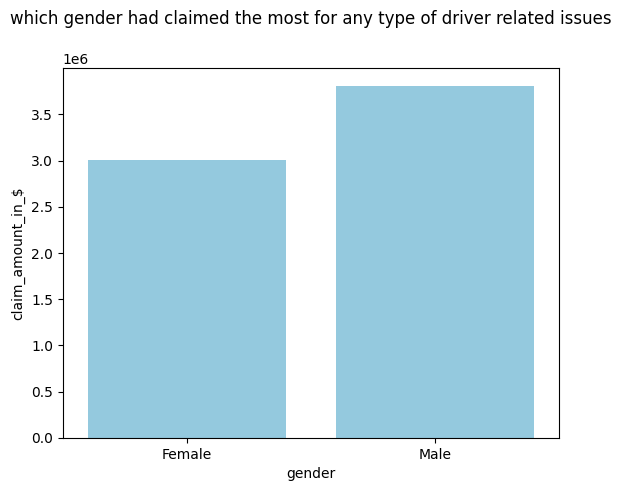

In [128]:
import seaborn as sns
sns.barplot(data=male_female,x='gender',y='claim_amount_in_$',color='skyblue')
plt.title('which gender had claimed the most for any type of driver related issues\n')
plt.show()

#### Hence,Among males and females,'Male' claimed the most for any type of driver related issues

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

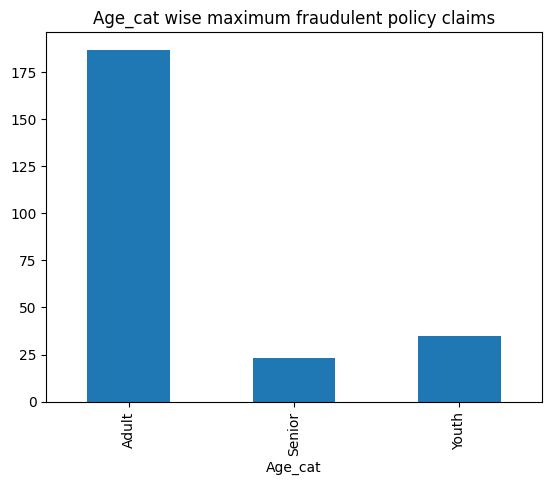

In [129]:
fraudulent=claimscustomer[(claimscustomer.fraudulent.str.contains('Yes'))].groupby('Age_cat').count().fraudulent
fraudulent.plot(kind='bar')
plt.title('Age_cat wise maximum fraudulent policy claims')
plt.show()

#### Hence,Age_cat wise maximum fraudulent policy claimed by Adults

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [130]:
claimscustomer['claim_month']=claimscustomer['claim_date'].dropna().apply(lambda x: pd.Timestamp.strftime(x,format="%B"))

In [131]:
claim_by_month=claimscustomer.groupby('claim_month')[['claim_amount_in_$']].sum().reset_index().round()
claim_by_month

sort_ref= ['January','February','March','April','May','June','July','August','September','October','November','December']
claim_by_month.index= pd.CategoricalIndex(claim_by_month['claim_month'],categories=sort_ref, ordered=True)
claim_by_month=claim_by_month.sort_index().reset_index(drop=True)
claim_by_month

,claim_month,claim_amount_in_$
0,January,1258838.0
1,February,1125496.0
2,March,1271442.0
3,April,1272990.0
4,May,1036368.0
5,June,1220460.0
6,July,1291460.0
7,August,882012.0
8,September,885583.0
9,October,1331545.0


<Figure size 1500x1500 with 0 Axes>

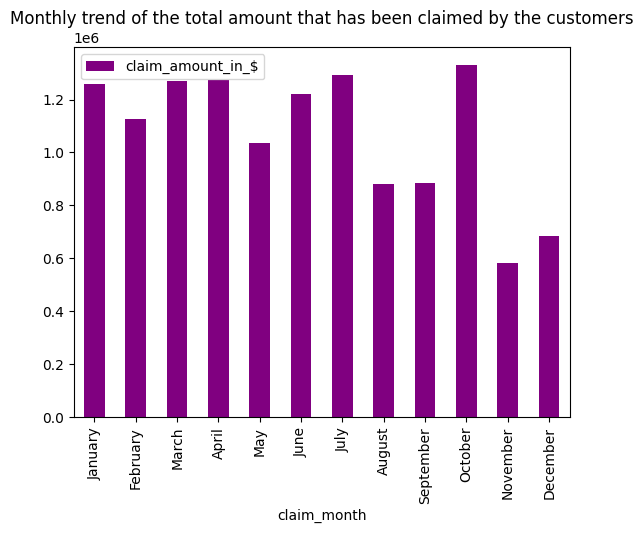

In [132]:
plt.figure(figsize=(15,15))
claim_by_month.plot(kind='bar',x='claim_month',y='claim_amount_in_$',color='purple')
plt.title('Monthly trend of the total amount that has been claimed by the customers')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

In [133]:
claimscustomer.head(1)

,Customer_Id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount_in_$,total_policy_claims,fraudulent,alert_flag,Age,Age_cat,claim_month
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,1,56,Adult,October


In [134]:
avg_claims_amt=round(claimscustomer.groupby(['gender','Age_cat','fraudulent'])['claim_amount_in_$'].mean().reset_index())
avg_claims_amt

,gender,Age_cat,fraudulent,claim_amount_in_$
0,Female,Adult,No,11943.0
1,Female,Adult,Yes,11880.0
2,Female,Senior,No,11323.0
3,Female,Senior,Yes,3636.0
4,Female,Youth,No,12145.0
5,Female,Youth,Yes,7925.0
6,Male,Adult,No,11596.0
7,Male,Adult,Yes,14885.0
8,Male,Senior,No,12423.0
9,Male,Senior,Yes,19463.0


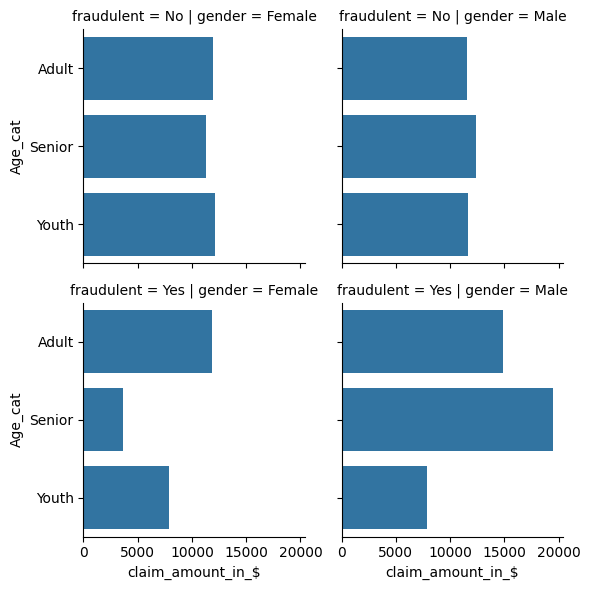

In [135]:
g = sns.FacetGrid(avg_claims_amt, row="fraudulent", col="gender")
g.map_dataframe(sns.barplot, "claim_amount_in_$","Age_cat")

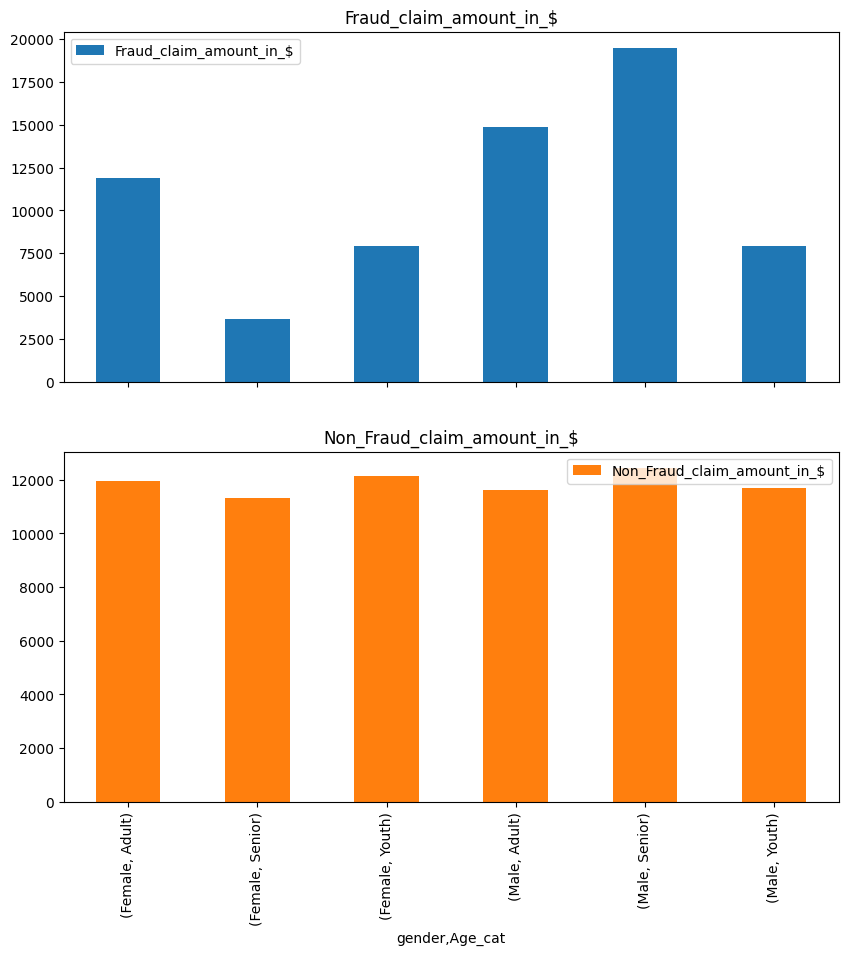

In [136]:
fraud_amt=(claimscustomer[(claimscustomer.fraudulent=="Yes")].groupby(["gender","Age_cat"])[["claim_amount_in_$"]].mean().add_prefix("Fraud_"))
non_fraud_amt=(claimscustomer[(claimscustomer.fraudulent=="No")].groupby(["gender","Age_cat"])[["claim_amount_in_$"]].mean().add_prefix("Non_Fraud_"))
Claims_age_gender=round(pd.merge(fraud_amt,non_fraud_amt, on=["gender","Age_cat"]),2)
Claims_age_gender

Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

## Statistics Questions

### 16. Is there any similarity in the amount claimed by males and females?

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀): The mean amount claimed by males is not equal to the mean amount claimed by females.
### Ho:m1=m2

#### Alternative Hypothesis (Hₐ): The mean amount claimed by males is  equal to the mean amount claimed by females.
### Ho:m1!=m2


### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*

#### data set`s 

In [137]:
male_claims_amt=claimscustomer.loc[claimscustomer.gender=='Male']['claim_amount_in_$']
male_claims_amt

0       42124.5
2        2420.0
3        1830.0
7        2740.0
8        2290.0
         ...   
1067    19120.0
1068    37290.0
1069     2967.0
1071    20310.0
1076     2080.0
Name: claim_amount_in_$, Length: 551, dtype: float64

In [138]:
female_claims_amt=claimscustomer[claimscustomer.gender=='Female']['claim_amount_in_$']
female_claims_amt

1        1940.0
4        2740.0
5       17020.0
6       26310.0
9        1860.0
         ...   
1072     2900.0
1073    20200.0
1074    27670.0
1075    17290.0
1077    30930.0
Name: claim_amount_in_$, Length: 527, dtype: float64

#### These are independent samples. hence we will perform the two tail t-test for independed sample

In [139]:
print('The avg amt claimed by female is:')
female_claims_amt.mean()

The avg amt claimed by female is:


11563.987666034156

In [140]:
print('The avg amt claimed by male is:')
male_claims_amt.mean()

The avg amt claimed by male is:


12247.055353901997

### Conducting the test

In [141]:
import scipy.stats as stats

In [142]:
test=stats.ttest_ind(male_claims_amt,female_claims_amt)
test

TtestResult(statistic=0.8264252658756743, pvalue=0.4087461087025911, df=1076.0)

#### Comparing p-value with p-critical

In [272]:
p=test.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: The mean amount claimed by males is equal to the mean amount claimed by females')
else:
    print('We failed to reject null hypothesis\n Conclusion: The mean amount claimed by males is not equal to the mean amount claimed by females')

We failed to reject null hypothesis
 Conclusion: The mean amount claimed by males is not equal to the mean amount claimed by females


### 17. Is there any relationship between age category and segment?

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀): There is no relationship between age category and segment
### Ho:m1!=m2

#### Alternative Hypothesis (Hₐ): There is  relationship between age category and segment
### Ho:m1=m2


### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*

### data set1s

In [213]:
age_cat_segment=pd.crosstab(index=claimscustomer['Age_cat'],columns=claimscustomer['Segment'])
age_cat_segment

Segment,Gold,Platinum,Silver
Age_cat,,,
Adult,275,269,257
Senior,31,28,24
Youth,65,64,65


### These are two categorical variables. hence we will perform the Chi-Square test 


### Conducting test

In [242]:
import scipy.stats as stats

In [236]:
test1=stats.chi2_contingency(age_cat_segment)
test1

Chi2ContingencyResult(statistic=0.6555942802166145, pvalue=0.9566900117530635, dof=4, expected_freq=array([[275.66883117, 268.23840445, 257.09276438],
       [ 28.56493506,  27.79499072,  26.64007421],
       [ 66.76623377,  64.96660482,  62.26716141]]))

### Comparing p-value with p-critical

In [270]:
p=test1.pvalue
if p<0.05:
    print('we reject null hypothesis\n Conclusion: There is relationship between age category and segment')
else:
    print('we failed to reject null hypothesis\n Conclusion:There is no relationship between age category and segment')

we failed to reject null hypothesis
 Conclusion:There is no relationship between age category and segment


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀):  The mean claim amount in the current year is equal to the 2016-17 fiscal average of $10,000.
### Ho:m=10000

#### Alternative Hypothesis (Hₐ): The mean claim amount in the current year is greater than the 2016-17 fiscal average of $10,000.
### Ho:m>10000


### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*

#### data set`s

In [145]:
claimscustomer['Claim_Year']=claimscustomer['claim_date'].dt.year

In [186]:
claimscustomer['Claim_Year'].astype('Int64')


0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
1073    2017
1074    2017
1075    2017
1076    2017
1077    2017
Name: Claim_Year, Length: 1078, dtype: Int64

In [205]:
claims_amt=claimscustomer[claimscustomer.Claim_Year==2018][['claim_amount_in_$']]
claims_amt

,claim_amount_in_$
0,42124.5
1,1940.0
2,2420.0
3,1830.0
4,2740.0
...,...
480,2740.0
481,25030.0
482,44838.5
483,2240.0


### Conducting test

In [190]:
import scipy.stats as stats

In [206]:
tests=stats.ttest_1samp(claims_amt,popmean=10000)

In [207]:
tests

TtestResult(statistic=array([3.30159658]), pvalue=array([0.00103243]), df=array([484]))

In [268]:
p=tests.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion : The mean claim amount in the current year is greater than the 2016-17 fiscal average of $10,000')
else:
    print('We failed to reject null hypothesis\n Conclusion: The mean claim amount in the current year is equal to the 2016-17 fiscal average of $10,000')

We reject null hypothesis
 Conclusion : The mean claim amount in the current year is greater than the 2016-17 fiscal average of $10,000


0

### 19. Is there any difference between age groups and insurance claims?

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀): There is no difference in the mean insurance claims between different age groups.
### Ho:m1=m2=m3

#### Alternative Hypothesis (Hₐ): There is  difference in the mean insurance claims between different age groups.
### Ho:m1!=m2!=m3


### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*

### Data set`s

In [241]:
age_groups_insurance_claims=pd.crosstab(index=claimscustomer.claim_type,columns=claimscustomer.Age_cat)
age_groups_insurance_claims

Age_cat,Adult,Senior,Youth
claim_type,,,
Injury only,143,12,39
Material and injury,184,21,32
Material only,474,50,123


### Conducting Test

In [243]:
import scipy.stats as stats

In [245]:
test2=stats.chi2_contingency(age_groups_insurance_claims)
test2

Chi2ContingencyResult(statistic=4.9599249628354665, pvalue=0.29143421712727857, dof=4, expected_freq=array([[144.15027829,  14.93692022,  34.91280148],
       [176.10111317,  18.24768089,  42.65120594],
       [480.74860853,  49.81539889, 116.43599258]]))

In [267]:
p=tests.pvalue
if p<0.05:
    print('We reject null hypothesis\n Conclusion: There is difference in the mean insurance claims between different age groups')
else:
    print('We failed to reject null hypothesis\n Conclusion: There is no difference in the mean insurance claims between different age groups')

We reject null hypothesis
 Conclusion: There is difference in the mean insurance claims between different age groups


### 20. Is there any relationship between total number of policy claims and the claimed amount?

### Null hypothesis and Alternate hypothesis are as below


#### Null Hypothesis (H₀): There is NO relationship between total number of policy claims and the claimed amount.
### Ho:m1!=m2

#### Alternative Hypothesis (Hₐ): There is relationship between total number of policy claims and the claimed amount.
### Ho:m1=m2


### *Confidence level is = 95%*


### *Significant level is (100-95=5%)*

#### *The significance level is 5% (0.05)*


### *P-critical = 0.05%*

### Data set`s

In [258]:
amt=claimscustomer['claim_amount_in_$']
amt

0       42124.5
1        1940.0
2        2420.0
3        1830.0
4        2740.0
         ...   
1073    20200.0
1074    27670.0
1075    17290.0
1076     2080.0
1077    30930.0
Name: claim_amount_in_$, Length: 1078, dtype: float64

In [260]:
policys=claimscustomer['total_policy_claims']
policys

0       1.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
1073    1.0
1074    1.0
1075    1.0
1076    1.0
1077    1.0
Name: total_policy_claims, Length: 1078, dtype: float64

### Conducting test

In [ ]:
import scipy.stats as stats

In [262]:
test3=stats.pearsonr(amt,policys)
test3

PearsonRResult(statistic=-0.020011715687672252, pvalue=0.5116013291543016)

### Comparing p-value with p-critical

In [265]:
p=test3.pvalue
if p<0.05:
    print('we reject null hypothesis\n There is relationship between total number of policy claims and the claimed amount')
else:
    print('we failed to reject null hypothesis\n Conclusion : There is NO relationship between total number of policy claims and the claimed amount')

we failed to reject null hypothesis
 Conclusion : There is NO relationship between total number of policy claims and the claimed amount
